In [2]:
!pip install tf-centernet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/niconielsen32/ObjectTracking.git
!pip install -r /content/ObjectTracking/requirements.txt


Cloning into 'ObjectTracking'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 43 (delta 1), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 5.1 MB/s 
     |████████████████████████████████| 12.5 MB 32.3 MB/s 
     |████████████████████████████████| 1.5 MB 36.6 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=a8f4dc934e8e9c9a5b3ef10a7df20633da9a16cc64694ac5ebd6a720f41ff955
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1590199 sha256=21a76587e920a3d7a6fb646f755241aea352febb4239a369e1269d757916979d
  Stored in directory: /root/.cache/pip/

Object Tracking with SORT

In [5]:
import sys
import os
from google.colab import files 
import centernet

sys.path.append("/content/ObjectTracking")
from sort import Sort
from lib import VisTrack,show_video,create_video

import numpy as np
import PIL.Image
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import shutil

Downloading our model

In [8]:
obj = centernet.ObjectDetection(num_classes=80)
obj.load_weights(weights_path=None)

766877696/766861424 [==============================] - 34s 0us/step


Prediction on Images

--2022-07-05 09:53:01--  https://akm-img-a-in.tosshub.com/indiatoday/images/story/201405/cctv-1_650_050214084429.jpg
Resolving akm-img-a-in.tosshub.com (akm-img-a-in.tosshub.com)... 184.85.24.225, 2600:1408:c400:189::1ac0, 2600:1408:c400:191::1ac0
Connecting to akm-img-a-in.tosshub.com (akm-img-a-in.tosshub.com)|184.85.24.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100288 (98K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  97.94K   141KB/s    in 0.7s    

2022-07-05 09:53:03 (141 KB/s) - ‘img.jpg’ saved [100288/100288]



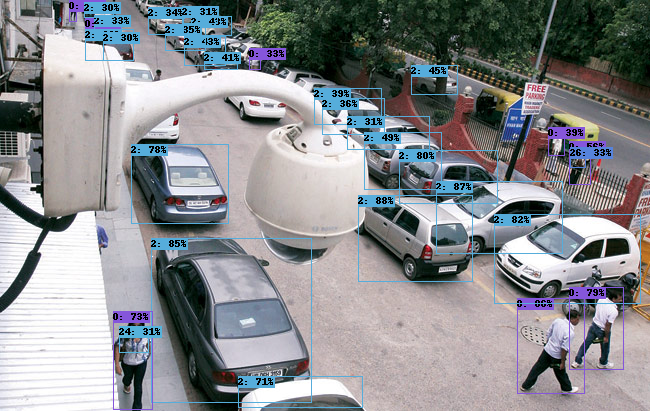

In [9]:
!wget https://akm-img-a-in.tosshub.com/indiatoday/images/story/201405/cctv-1_650_050214084429.jpg -O img.jpg

p_img=PIL.Image.open('img.jpg')
img=cv2.cvtColor(np.array(p_img),cv2.COLOR_BGR2RGB)
boxes,classes,scores = obj.predict(img)

vt=VisTrack()
vt.draw_bounding_boxes(p_img,boxes,classes,scores)